<a href="https://colab.research.google.com/github/souchem23/data-science-coursework/blob/main/Unit3/SoumikC_Unit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation


Hello! Welcome to my Unit 3 project!

At a high level, I created a prediction model for determining the amount of water flowing through a water valve as an indicator of a cyber-physical system attack. Forecasting these values can provide insights into more effective counter-measures against these networks.

Here are some buzz words to get you started: Cyber-physical systems! Network attacks! IoT's (Internet of Things)! Water Pipes!

**Cyber-physical systems:**

Control systems that automatically control certain processes that are occuring in a water/energy plant.

**Network Attacks:**

Attackers choose to target certain devices or sensors on a network to manipulate data being sent..

**IoTs (Internet of Things):**

Internet of Things are small devices like sensors that are used to control devices.

**Water Pipes:**

Water pipes are pipes often used to treat water at water plants.

Enjoy!


Start by importing packages: preliz, numpy, arviz, pymc, pandas.

---

In [2]:
!pip install preliz
import preliz as pz

import numpy as np
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 576.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


## Introduction (Context)

### Motivation

*   In modern society, attackers have begun using attacks to target specific systems and devices used to support thousands
*   Cyber-physical systems are control systems automatic control of a certain process like energy/water plants.

###Relevance

* Stuxnet: Computer virus (worm) that disabled part of a nuclear power plant
* These attacks have the capability to kill thousands of people if not detected in a quick manner.

###How is it Measurable?
* Attackers make specific choices when sending their computer viruses to these systems (manipulating certain settings)
* For a water plant, this feature is the amount of water being sent through the pipe at a time (water pressure).
* This value is often recorded during a certain time interval for maintanence purposes.
* Dire need to predict the values of these water values to determine the presence of an attack.
* Given water valve pressures during cyber attacks, I will make a predictive model regarding these values for any attack.

## Likelihood (Water Pressure Dataset Interpretation)

Given our likelihood, we will also have to form our priors for the parameters of the distribution model that is going to represent our likelihood.

* Our dataset is going to be coming from "BATADAL: Cyber Attacks Detection in Water Systems" by Minh T. Nguyen on Kaggle.
* This data has certain characteristics which will not be useful for our analysis.
*Our data for this project will only involve the pressure of valve "Junction 422" during a cyber attack.

In the subsequent code block, the dataset will be processed to become a form that is useful for us. We will filter if the valve pressure recording is occuring during an attack.

In [3]:
#Reading in the data
network_data = 'https://raw.githubusercontent.com/souchem23/data-science-coursework/refs/heads/main/waterPressureRecordings.csv'
network_data_csv = pd.read_csv(network_data)

#Filtering the data
networkSize = network_data_csv.query('ATT_FLAG == 1')
networkSize = networkSize[['P_J422']]
networkSize

,P_J422
297,28.37
298,27.85
299,24.49
300,23.75
301,26.88
...,...
1965,28.17
1966,28.98
1967,28.38
1968,28.40


### Histogram

(array([ 14.,  19.,  20.,  83., 169.,  68.,  26.,   2.,   3.,   3.]),
 array([21.74 , 23.708, 25.676, 27.644, 29.612, 31.58 , 33.548, 35.516,
        37.484, 39.452, 41.42 ]),
 <BarContainer object of 10 artists>)

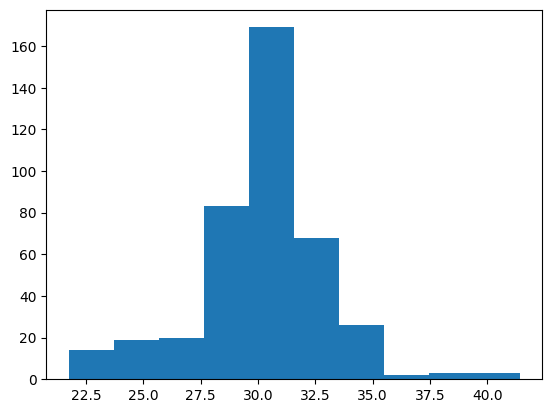

In [ ]:
#Plotting the histogram
plt.hist(networkSize)

By analyzing the histogram generated for our likelihood, we can make a few observations:


*   Most of the water valve pressure data seems to be centered around 30.5 Pascal.
*   There is a more gradual increase over time to the center value from the left side compared to a more abrupt decrease for the right side of this historgram
  * negative skew for our final distribution
* Our data is not limited from 0 to 1, so we should not use a Bernoulli or Beta distribution
* The values can take on any positive, real number.




# Previous Attempts

## Iteration 1

### Likelihood Prediction

### Prior 1 (Mean, mu)

<Axes: >

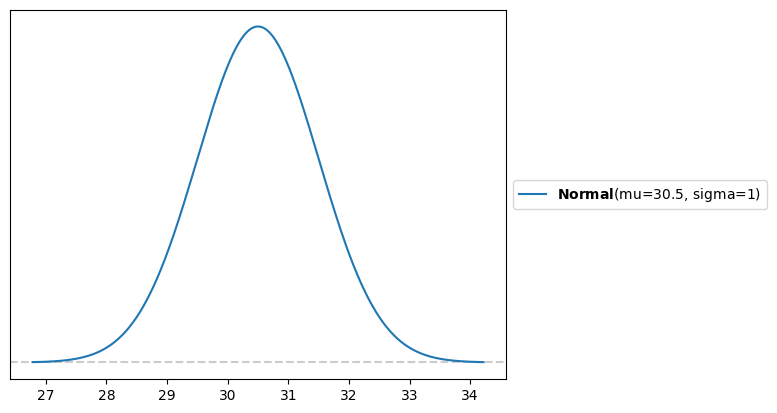

In [139]:
pz.Normal(mu=30.5, sigma=1).plot_pdf()


### Prior 2 (Standard Deviation, sigma)

<Axes: >

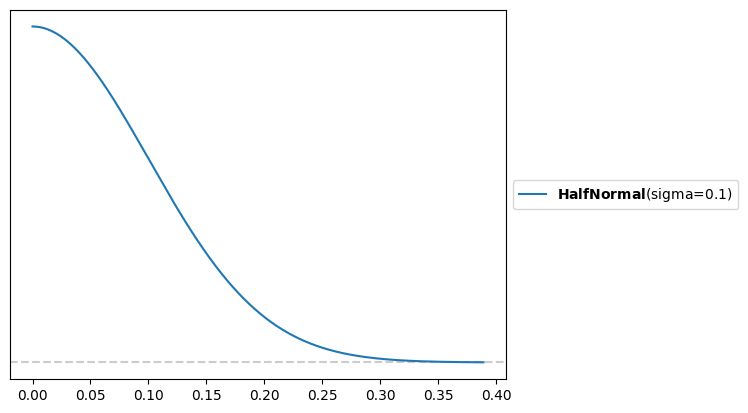

In [140]:
pz.HalfNormal(sigma=0.1).plot_pdf()

### Posterior Predictive Check #1

It is now time to check if our priors will correctly inform our final model/distribution to map out our likelihood.

First steps are to set up the code, and then we can see the visualization and make our analysis.

In [142]:
with pm.Model() as water_pipe:
    #  Normal distribution because we are confident about the mean of our data
    μ = pm.Normal('μ', mu=30.5, sigma=1)

    # Half  normal distribution because we think that the standard deviation values will be small
    σ = pm.HalfNormal('σ', sigma=0.1)

    # Creating likelihood with these two priors.
    Y = pm.InverseGamma('Y', mu = μ, sigma = σ, observed=networkSize)
    water = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

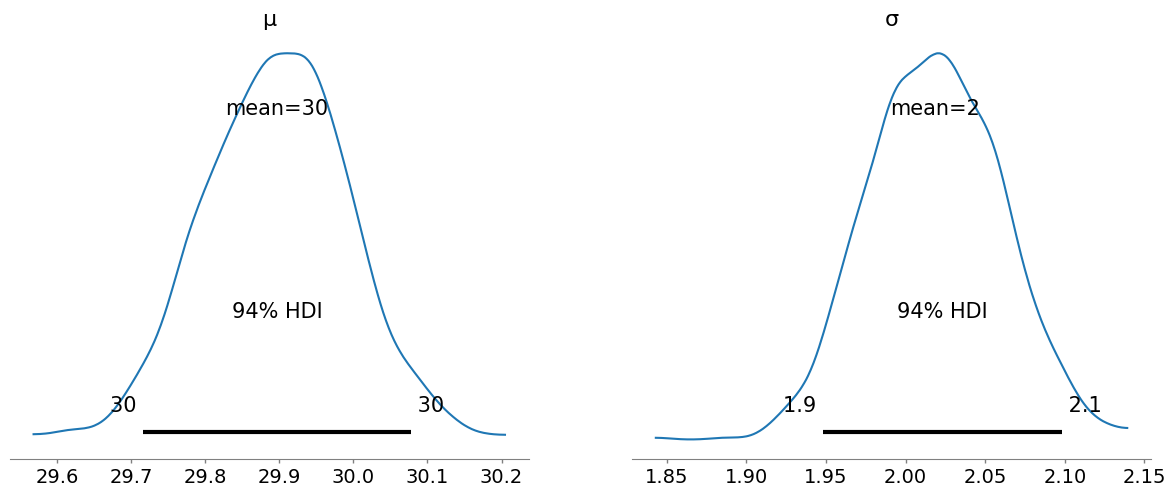

In [143]:
az.plot_posterior(water)

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

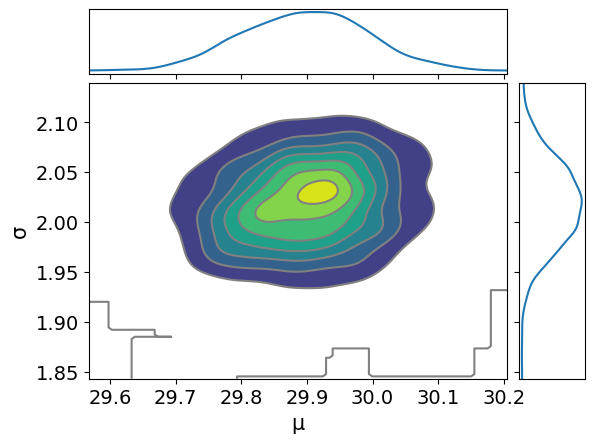

In [144]:
az.plot_pair(water, kind='kde', marginals=True)

In [145]:
pm.sample_posterior_predictive(water, model=water_pipe, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

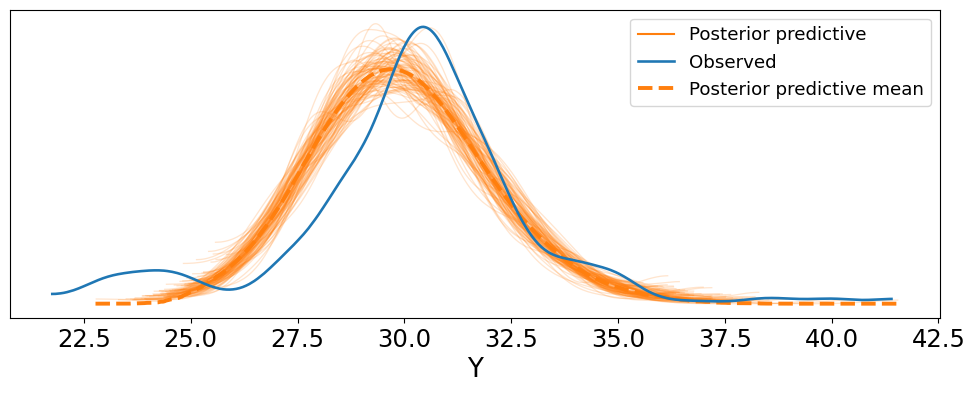

In [146]:
az.plot_ppc(water, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

#### Analysis

I think that this model is **OK**. There is definitely room for improvement, but it gets the job done and would be useful for this specific context. It still has some drawbacks, which cause me to think that we could make it better.

Let's analyze our predictive model with the observed data and discuss the four moments:

**MEAN:**

The mean of the posterior predctive model is much lower than the observed data.

**STANDARD DEVIATION:**

The standard deviation for the posterior predictive model looks to be a lot larger since it is a much wider graph than the observed data distribution.

**SKEWNESS**

The posterior predictive one seems to have no skew while the actual observed should have a negative skew (left tail is longer than right tail).

**KURTOSIS:**

The observed data distribution has a much higher kurtosis than the posterior predictive model.
*   The obsesrved data has a much steeper top and a flatter tail, so it has a higher kurtosis.
*   The posterior predictive model has a more "mesokurtic" like kurtosis because the ends are siimilar and it has a much flatter peak than the observed
* **This indicates that our final predictive model should consider outliers as a larger/more important factor than already being considered.**


#### What are we going to do?

We need to now come up with a model with a greater consideration for skew and kurtosis.

<center><bold>Why?</bold></center>

Well, attackers often like to do unpredictable things. We are trying to solve that problem right now by making a model to predict their behavior, but attackers may do wild actions to bypass certain restrictions. Considering this greater perpensity for outliers could grealty improve model accuracy.

## Iteration 2

### Likelihood Distribution

Next, I wanted to try using a Skew Normal Distribution for my likelihood. Using the PreliZ documentation, I made a few observations:
* the Skew Normal Distribution takes all real numbers.
* It takes in a mean and standard deviation (mu and sigma respectively) parameter that could be usedful in my model
* The main benefit over the Inverse Gamma Distribution is that there is also a specific parameter for skew (alpha) that can be used to account for the lack of skew in our previous posterior predictive distribution.
* Capable of modeling the very high peak in my histogram, once again, through the mainpulation of the parameters.

### Prior 1 (mean, mu)

<Axes: >

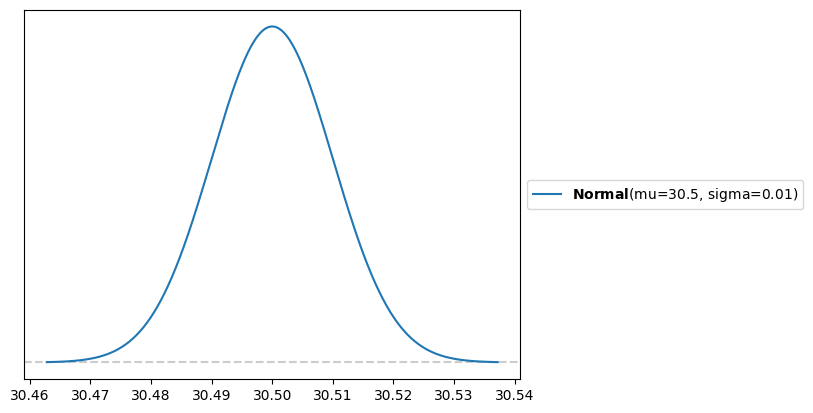

In [ ]:
pz.Normal(mu=30.5, sigma=0.01).plot_pdf()


### Prior 2 (Standard Deviation, sigma)

<Axes: >

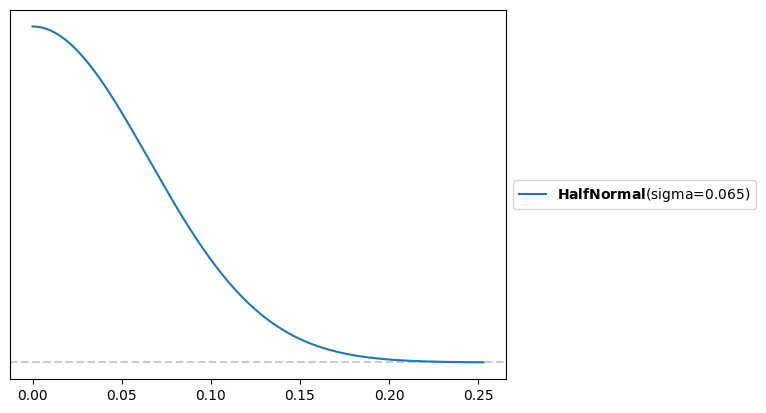

In [ ]:
pz.HalfNormal(sigma=0.065).plot_pdf()

### Prior 3 (Skew, alpha)

This third prior for the "alpha" parameter will represent the skew of our final Skew Normal Distribution.


* Assuming that attackers will more frequently water through valves at a pressure value that closely resembles the standard value.
* They want to avoid as much suspicion possible, so they will send more frequently water pressure values leading up the mean.
* This will create a negative skew for the final distribution.
That said, there is not a super large, but a small trend that aligns with the human tendency to act with more caution when trying to avoid punishment.
* Want to use a smaller skew value.
* Don't want to use a Normal Distribution becuause I am not super confident in my prior.
* Still want to be focused close to -1 without much fluctuation, so I will choose a Gumbel Distribution.
* Will choose a *mu value* of -1 and a *beta value* of 0.1 for the this prior.



<Axes: >

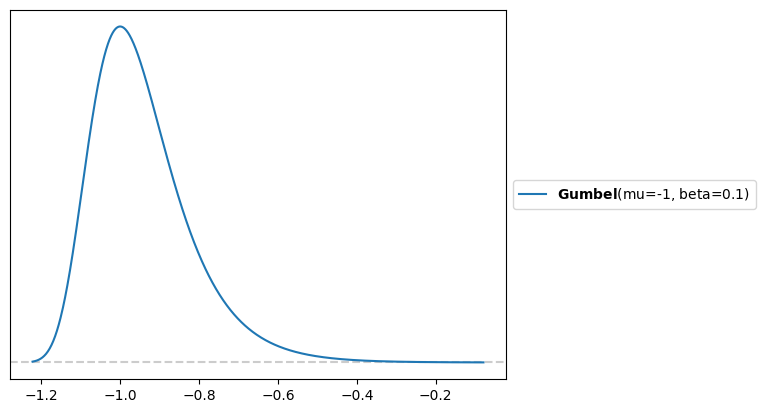

In [ ]:
pz.Gumbel(mu=-1, beta=0.1).plot_pdf()

### Posterior Predictive Check #2

Time to check if our second iteration of our prior will be a bit better!

In [ ]:
with pm.Model() as water_pipe:
    # mu parameter
    μ = pm.Normal('μ', mu=30.5, sigma=0.01)

    # standard deviation half normal distribution
    σ = pm.HalfNormal('σ', sigma=0.065)

    # Gumbel distribution for skew
    m = pm.Gumbel('ν', mu=-1, beta=0.1)

    # Three priors used for our Skew Normal Distribution.
    y = pm.SkewNormal('y', mu=μ, sigma=σ, alpha=m, observed=networkSize)
    water = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'ν'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

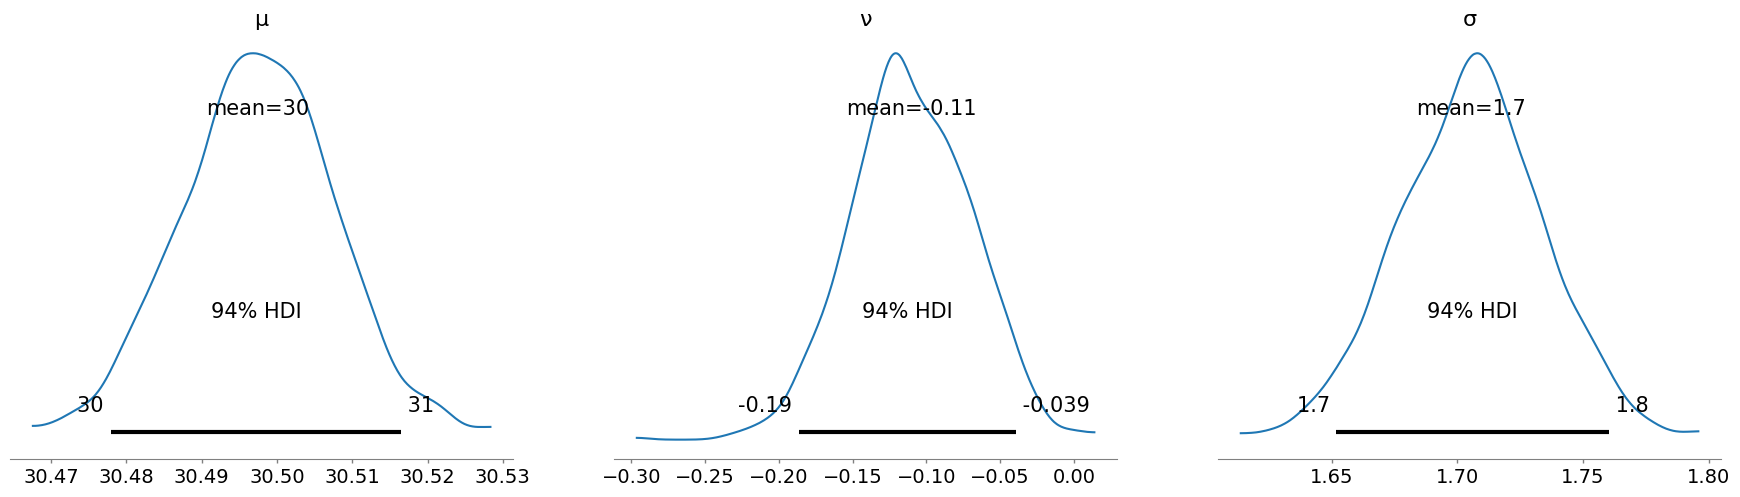

In [ ]:
az.plot_posterior(water)

Output()

<Axes: xlabel='y'>

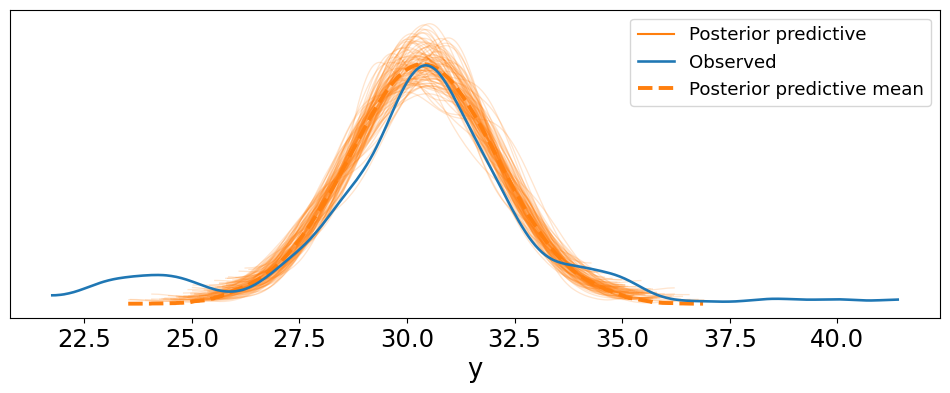

In [ ]:
pm.sample_posterior_predictive(water, model=water_pipe, extend_inferencedata=True)
az.plot_ppc(water, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

#### Analysis

I think that this model is **MUCH BETTER**. This model would be much more useful for the context provided as opposed to the previously genereated model.

Let's go! It's time to analyze our predictive model with the observed data and discuss the four moments:

**MEAN:**

The means for both the observed data distribution and the posterior predictive mean look extremeley close- good improvement.

**STANDARD DEVIATION:**

The posterior predictive model has a larger standard deviation again in comparison to the observed data distribution model.

**SKEWNESS**

The posterior predictive has a larger left tail than the right tail (negative skew), but the effect is being offset by the larger standard deviation.

**KURTOSIS:**

The kurtosis value is a lot more similar now to the observed data. In general, the posterior predictive check has a much higher kurtosis value now, in comparison to the preivious iteration.

*   The predictive data, now, has a much steeper top and a flatter tail, so it has a higher kurtosis.
*   The final predictive model will not do a better job considering outliers and will consider high values that are very close to the mean.



## Iteration 3

### Likelihood Distribution

I am going to try to use an AssymetricLaplace distribution.


*   Accepts all real numbers as part of the domain
*   Capable of modeling skew
* Able to reach high peaks that my observed data represents



### Prior 1 (mu, location)

<Axes: >

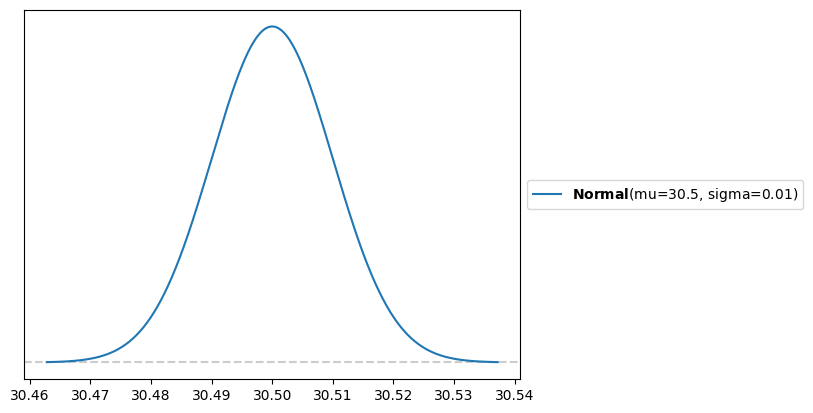

In [149]:
pz.Normal(mu=30.5, sigma=0.01).plot_pdf()

### Prior 2 (kappa, symmetry)

<Axes: >

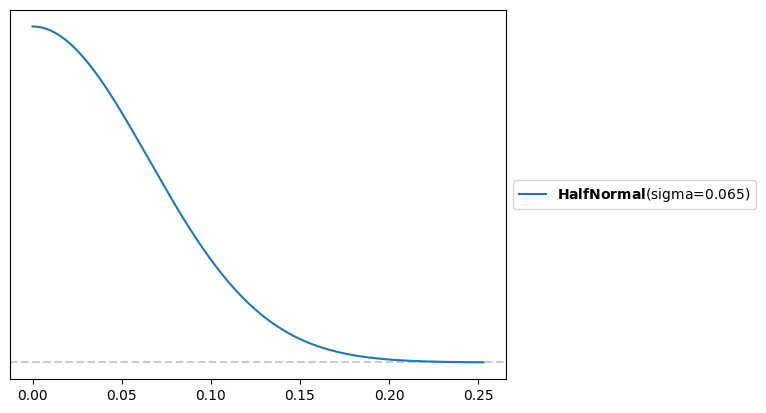

In [150]:
pz.HalfNormal(sigma=0.065).plot_pdf()

### Prior 3 (b, scale)

<Axes: >

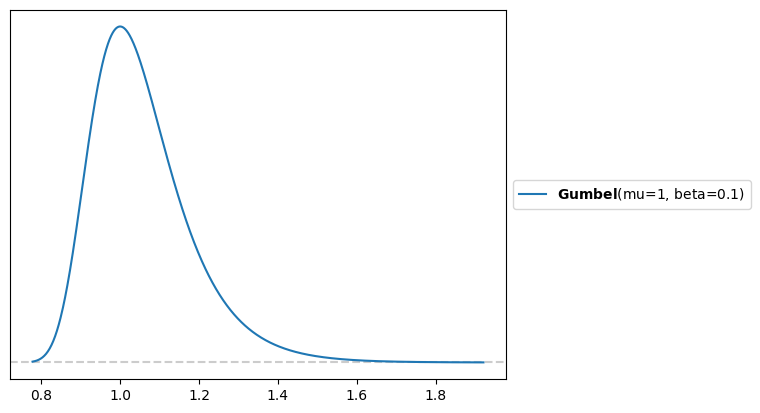

In [151]:
pz.Gumbel(mu=1, beta=0.1).plot_pdf()

### Posterior Predictive Check

In [152]:
with pm.Model() as water_pipe:
    # mu parameter
    μ = pm.Normal('μ', mu=30.5, sigma=0.01)

    # standard deviation half normal distribution
    σ = pm.HalfNormal('σ', sigma=0.065)

    # Gumbel distribution for skew
    m = pm.Gumbel('ν', mu=1, beta=0.1)

    # Three priors used for our Skew Normal Distribution.
    y = pm.AsymmetricLaplace('y', kappa=σ, mu=μ, b=m, observed=networkSize)
    water = pm.sample()

/usr/local/lib/python3.10/dist-packages/pytensor/tensor/math.py:893: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytensor/tensor/math.py:893: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytensor/tensor/math.py:893: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytensor/tensor/math.py:893: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytensor/tensor/math.py:893: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytensor/tensor/math.py:893: FutureWarning: sgn is deprecated and will stop working in the

Output()

Output()

Output()

<Axes: xlabel='y'>

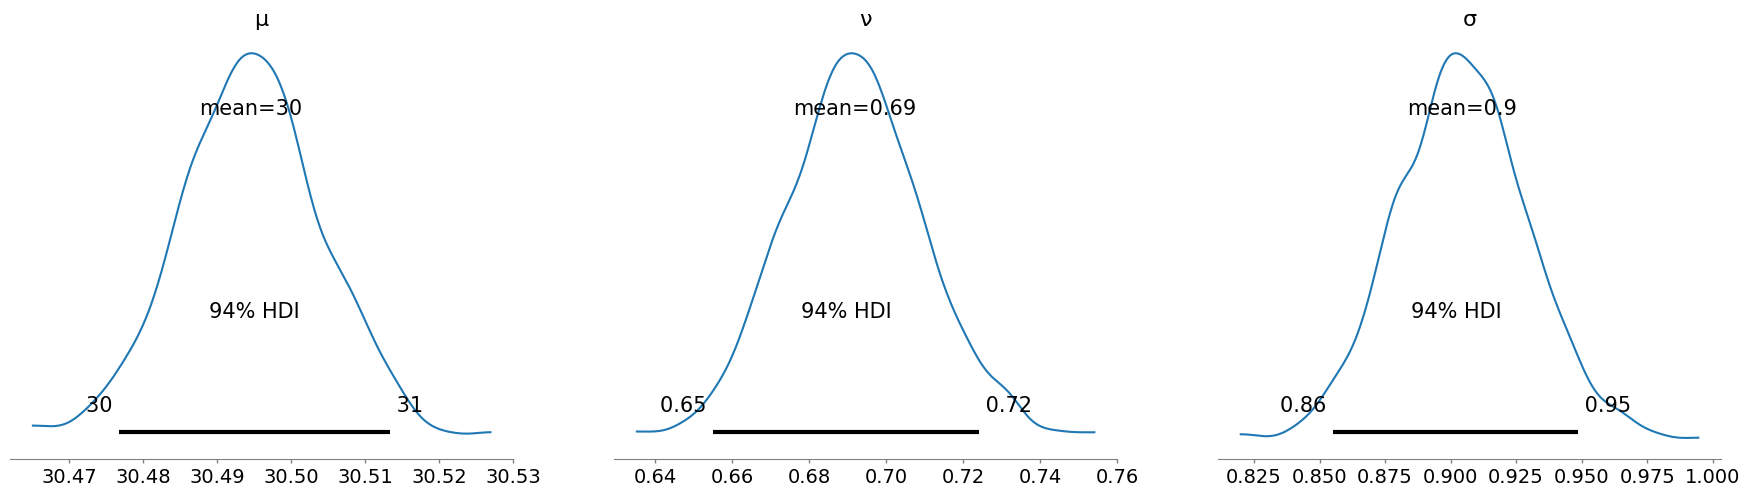

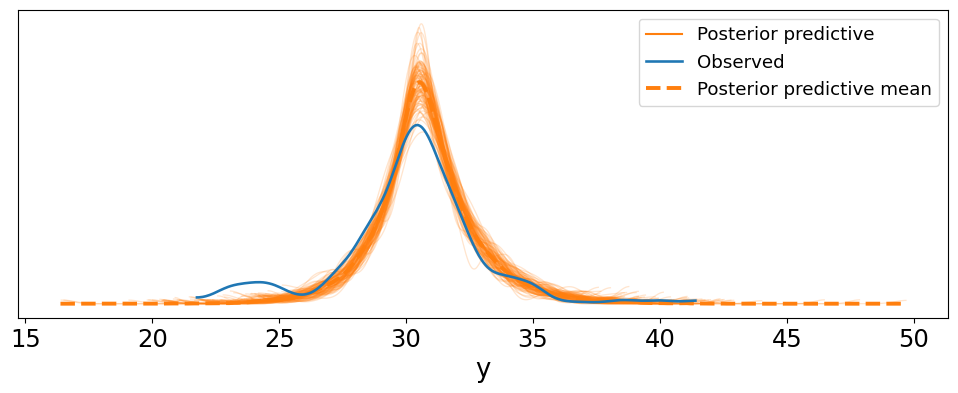

In [153]:
az.plot_posterior(water)
pm.sample_posterior_predictive(water, model=water_pipe, extend_inferencedata=True)
az.plot_ppc(water, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

### Analysis

This is also a **DECENT** model, but it has some drawbacks that I think we can do better.

**MEAN:**

The mean of the posterior predctive model is way higher than the observed data.

**STANDARD DEVIATION:**

The standard deviation for the posterior predictive model looks to be smaller than the observed distribution; it is a more compressed graph than the observed data distribution.

**SKEWNESS**

The posterior predictive distribution does not seem to have much skew, and looks evenly spread up until the mean.

**KURTOSIS:**

The observed data distribution has a much higher kurtosis than the posterior predictive model.
*   The obsesrved data has a much steeper top and a flatter tail, so it has a higher kurtosis.
*   Still need to do a better job considering outliers.


#Iteration 4

## Likelihood Distribution

I am going to try to use an SkewStudentT distribution.


*   Accepts all real numbers as part of the domain
*   Capable of modeling skew
* Able to reach high peaks that my observed data represents, while maintaining skew on whichever side specified.



## Prior 1 (mu, location)

<Axes: >

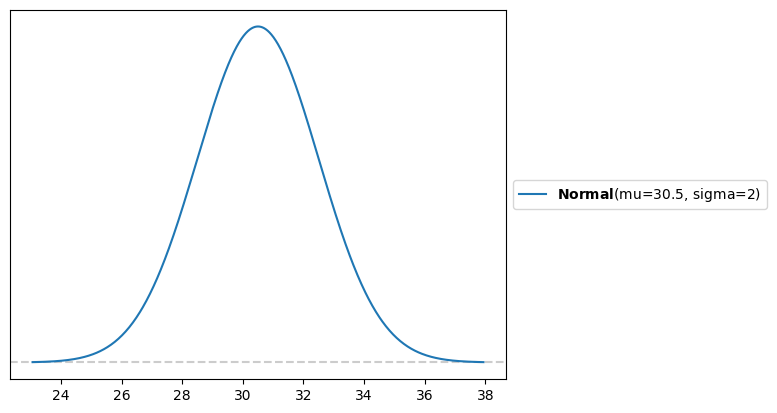

In [81]:
pz.Normal(mu=30.5, sigma=2).plot_pdf()

## Prior 2 (sigma, standard deviation)

<Axes: >

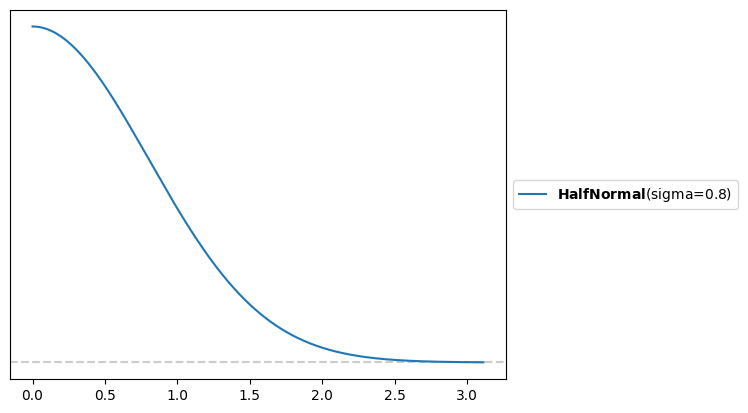

In [82]:
pz.HalfNormal(sigma=0.8).plot_pdf()

## Prior 3 (a, First Shape)

<Axes: >

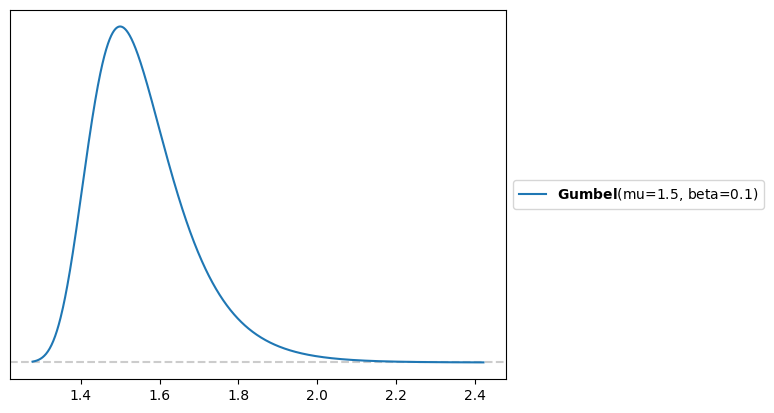

In [99]:
pz.Gumbel(mu=1.5, beta=0.1).plot_pdf()

## Prior 4 (b, Second Shape)

<Axes: >

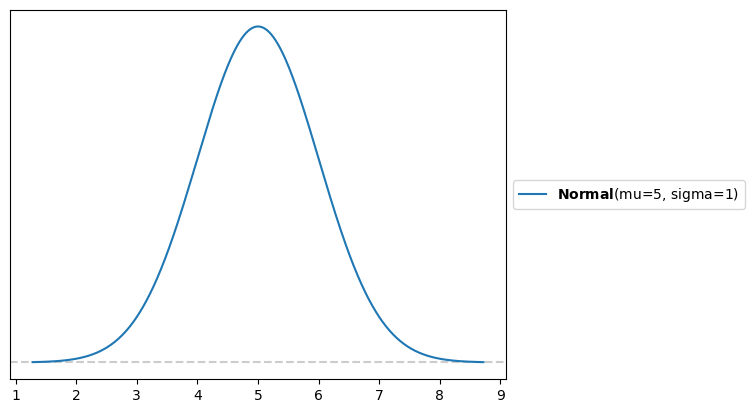

In [85]:
pz.Normal(mu=5, sigma=1).plot_pdf()

## Posterior Predictive Check

In [96]:
with pm.Model() as water_pipe:
    # mu parameter
    μ = pm.Normal('μ', mu=30.5, sigma=2)

    # standard deviation half normal distribution
    σ = pm.HalfNormal('σ', sigma=0.8)

    # Gumbel distribution for skew
    m = pm.Gumbel('ν', mu=1.5, beta=0.1)

    n= pm.Normal("b", mu=5, sigma=1)

    # Three priors used for our Skew Normal Distribution.
    y = pm.SkewStudentT('y', sigma=σ, mu=μ, a=m, b=n, observed=networkSize)
    water = pm.sample()

Output()

Output()

Output()

(20.0, 50.0)

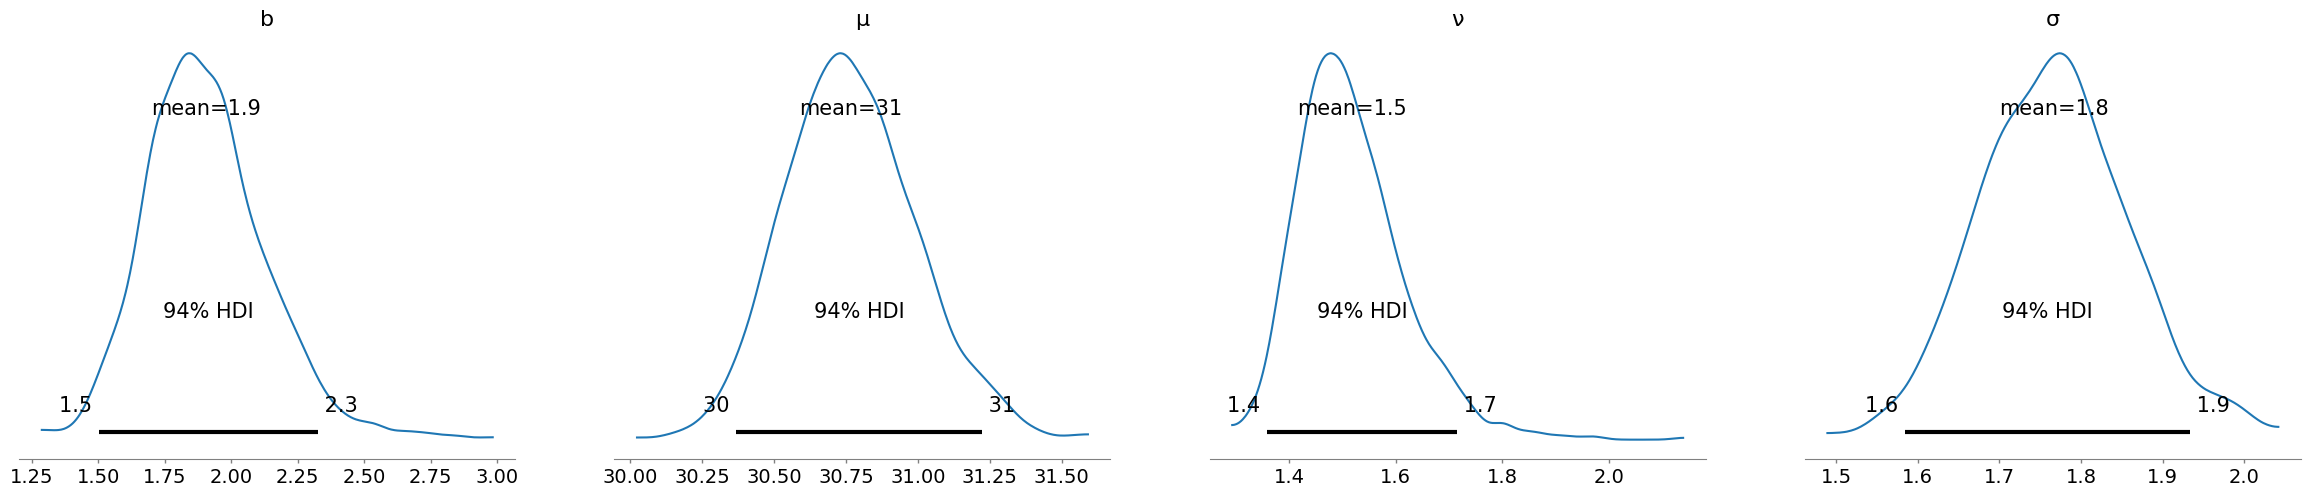

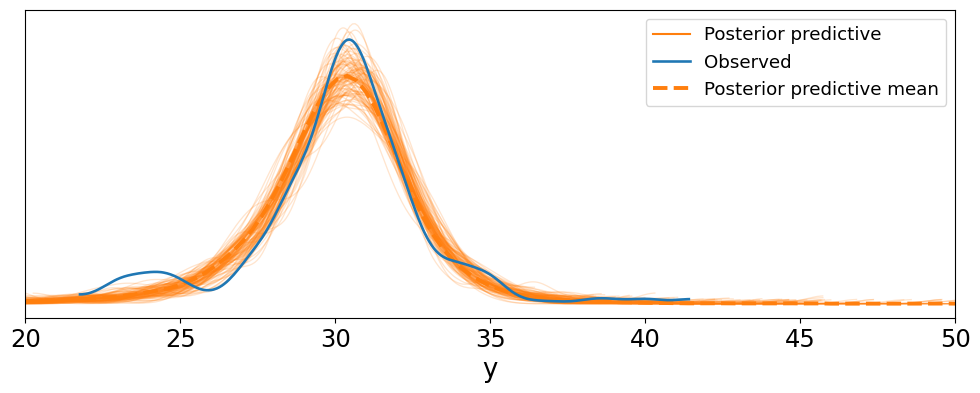

In [98]:
az.plot_posterior(water)
pm.sample_posterior_predictive(water, model=water_pipe, extend_inferencedata=True)
ax= az.plot_ppc(water, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(20, 50)

## Analysis

I think that this model is **CLOSER TO WHAT WE ARE LOOKING FOR**. It still has shortcomings, though.

Let's go.

**MEAN:**

The mean is closer than before, but it is still lower than the mean of the observed data distribution.

**STANDARD DEVIATION:**

The standared deviation value is much closer, although the distribution is a bit wider, so each of the values is a bit farther away from the mean in comparison to the observed data distribution.

**SKEWNESS**

The model has a longer left tail, so its skew matches that of the observed data. However, this skew is causing the model to be slightly to the left too much. What this means is that the observed data is **barely being encapsualted (on the left side)** by the posterior predictive samples, so it **can be improved in this aspect**

**KURTOSIS:**

Kurtosis is a bit lower since the peak is flatter than the observed data distribution.


# Final Model

## Likelihood Prediction

For my final model, I will use a Student T Distribution to model my likelihood.

* the StudentT distribution takes all real numbers into the domain
* It takes in a mean and standard deviation (mu and sigma respectively) parameter that could be useful in my final model
* Does not have skew
* Still able to map the high peaks that are seen in my final model.

## Prior 1 (mean, mu)

Remember that our priors are usually gonna be based on our prior knowledge and what we feel about the topic.

This first prior for the "mu" parameter is supposed to be for the mean of the StudentT Distribution.


*   Didn't choose uniform distribution because I knew some stuff about the topic already
*   In general, the amount of water pressure that flows depends on the water plant.
* The water plant portrayed in the dataset is a simulation of a smaller town, that I am *assuming* resembles the Woodland-Davis Water Treatment Plant (in terms of size) in California.
* The Woodland-David Water Treatment Plant (https://wdcwa.com/operations/water-treatment) is able to send approximately 34 million gallons/day, which is approximately 393.5 gallons/minute, which equates to around 24.7 Liters/second.
* Attackers usually manipulate valves to send more water at once, but just enough so that it does not raise suspicion.
* I feel that the attackers will send approximately 30.5 Liters/second as it can be considered an anomoly, without raising suspicion.
* I do not think there will be much fluctuation to this mean, so I will have a very low sigma value, to represent my confidence in this prior.
* *mu value* of 30.5 and *sigma value* of 0.1 will be used.



<Axes: >

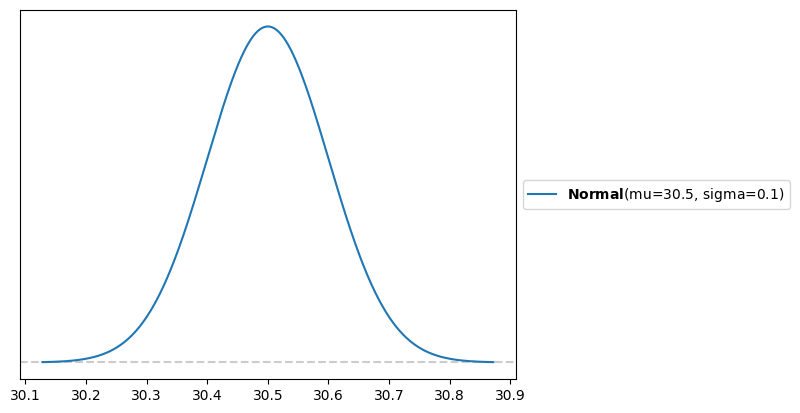

In [127]:
pz.Normal(mu=30.5, sigma=0.1).plot_pdf()

## Prior 2 (sigma, scale)

This second prior for the "sigma" parameter is supposed to be for the standard devation of this distribution.


* When looking at the histogram, we can observe that there seems to be a positive standard deviation, or variation, from the center of the visual
* Standard deviation does not look to appear to large
* Histogram is similar to a normal distribution that has skew, so the standard deviation looks like it should not be large.
* Range of values on histogram is from 22.5 to 40.0 with a mean around 30, so the values are not super far away from the mean.
* Half normal distribution depicts values that are much smaller, and closer to 0, so it will not test for large values of deviation
* Will choose a *sigma value* of 5 for the first prior.



<Axes: >

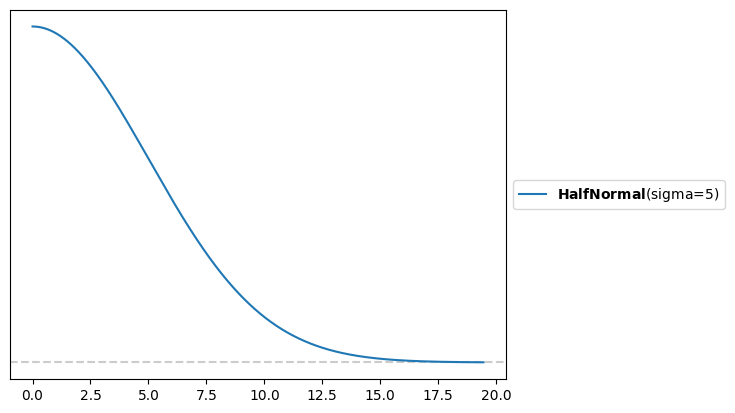

In [129]:
pz.HalfNormal(sigma=5).plot_pdf()

## Prior 3 (nu, normalization)

We know that a higher v means more normality.

From the answer key of the notes, we know that a value of v=30 is good choice to have a less "normal" graph because it will handle outliers better.

So, we will choose a lower value of v so that we can handle outliers.

In order to have values that are closer to 30, we can choose an exponential prior so that a majority of the predictions will be lower so that outliers will be handled a bit better. This effect can be achhieved by using an exponential prior that favors values smaller than 30.

From the answer key, we know that a value of 30 allows the StudentT distribution to be close to normal, so we will choose the same value.

<Axes: >

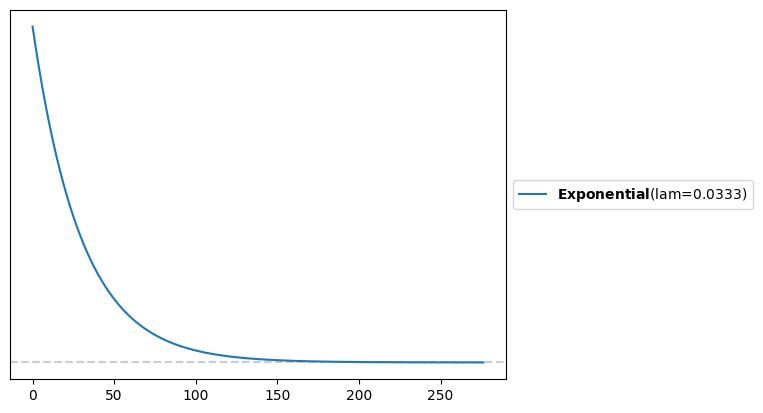

In [154]:
pz.Exponential(lam = 1/30).plot_pdf()

## Posterior Predictive Check

In [131]:
with pm.Model() as water_pipe:
    # mu parameter
    μ = pm.Normal('μ', mu=30.5, sigma=0.1)

    # standard deviation half normal distribution
    σ = pm.HalfNormal('σ', sigma=5)

    # normalization parameter
    m = pm.Exponential('ν', lam = 1/30)

    # # Three priors used for our Skew Normal Distribution.
    # y = pm.StudentT('y', mu=μ, sigma=σ, nu=m, observed=networkSize)
    y = pm.StudentT('y', mu=μ, sigma=σ, nu=m, observed=networkSize)
    water = pm.sample()

Output()

Output()

Output()

(20.0, 50.0)

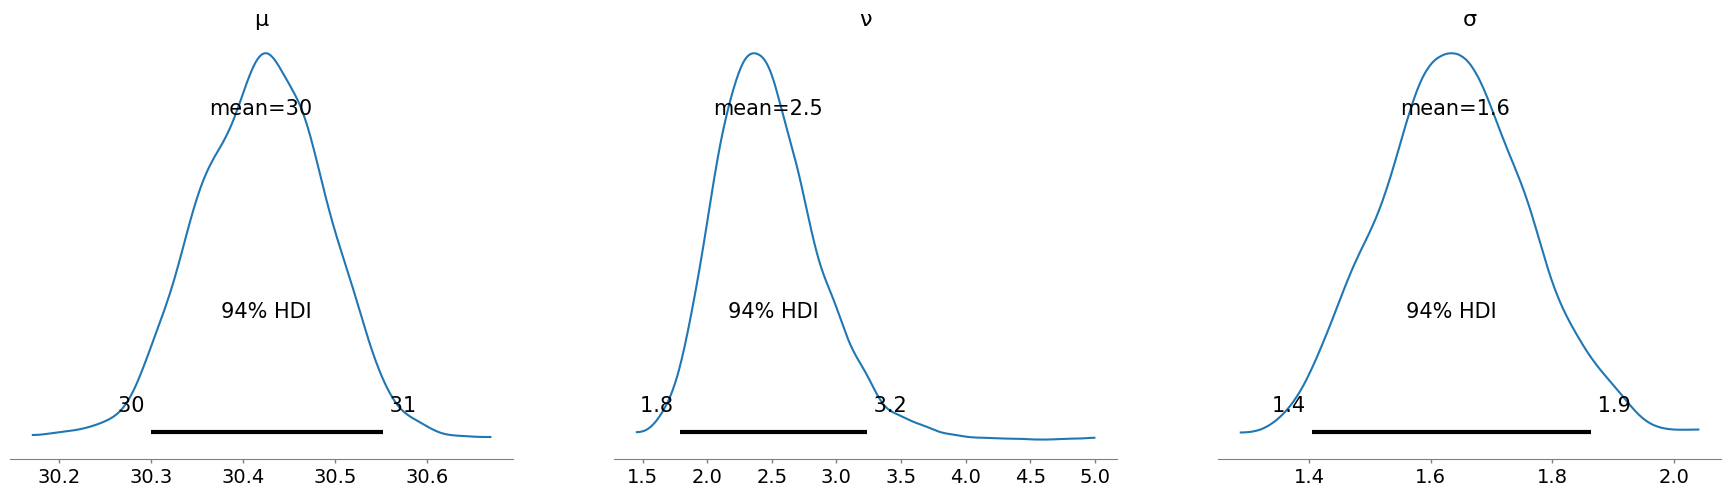

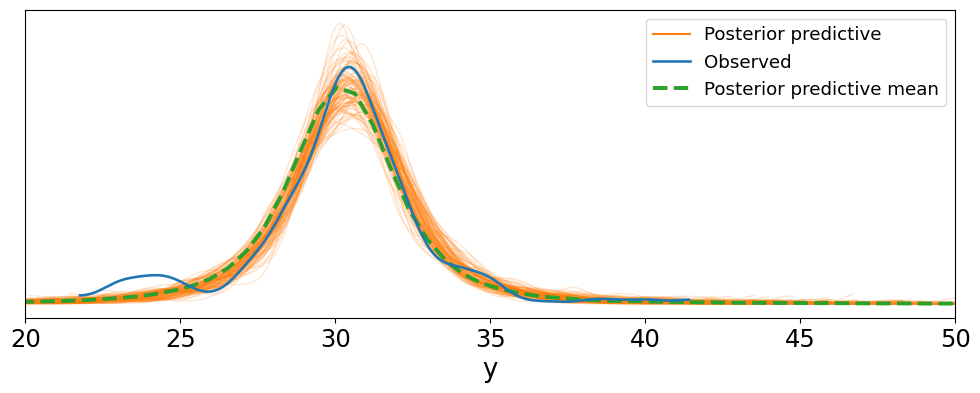

In [138]:
az.plot_posterior(water)
pm.sample_posterior_predictive(water, model=water_pipe, extend_inferencedata=True)
ax= az.plot_ppc(water, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(20, 50)

### Analysis

I think that this model is **GOOD**. This model would be much more useful for the context provided as opposed to the previously genereated model.

Time to understand why.

**MEAN:**

The mean is closer than before, but the mean is still a bit lower than that of the observed data. This can be observed because the peak of the posterior predictive distribution is lower than the peak of the observed data, although tha values closely align for certain portions of the distribution.

**STANDARD DEVIATION:**

Both have a similar, positive, standard deviation. The values similarly approach the mean from both sides. Remember that standard deviation describes how the data points are spread out around the mean. Data is kind of symmetrical, so the data points are spread out evenly around the mean for both graphs. They both have, about, the same width so the standard deviation is roughly the same for both graphs.

**SKEWNESS**

The StudentT distribution does not take the skew into much consideration. Even though the observed data has a bit of skew, I feel that the distribution without skew matches the curve a bit better.The orange posterior predictive samples match the observed data and surrounds the observed data distribution on pretty much all parts of the curve, so the skewness is mostly considered. The longer tail on the left is represented in the final predictive model.

**KURTOSIS:**

The kurtosis value is a bit lower than the observed data since the peak is a bit flatter than the observed data distribution. Still, it resembles the kurtosis of the previous graph. The tails have the same flattness, but the peaks are the only differing portion of the graph. This just means that the outliers will be considered to smaller extent, but it is better than over considering the outliers as that would cause the model to consistently choose higher values that attackers could evade. Lower values provide a bit of safety.


<b><h3>Does it reflect reality though?</h3></b>

# Final Thoughts/Concluding Remarks

## Reality Check

I think that my model does **NOT** match the distribution that I expected the distribution would have been to match for reality.

The StudentT distribution does a very good job of matching the data provided for this specific instance. It matches the curve and the distribution produced by the observed data.

However, the StudentT does not actually match reality. For network attacks on cyber-physical systems in general, from my previous knowledge, attackers are a bit more reseved in their attack. They are likely to choose lower frequency values leading up to mean so that their actions are not caught. This is why it was surprising that the distribution with skew (SkewNormal and SkewStudentT) performed worse than the StudentT distribution. They did not match the curve the best, but they were still very close to the final distribution. Note that there are very minute differences. The orange posterior predctive samples cover the observed data distribution much better in the StudentT distribution. the SkewStudentT and SkewNormal models come close, but they has a larger difference in standard deviation and much lower kurtosis which does not make it the best fit to match the curve only.

If I really only wanted to match the curve, the StudentT Distribtion would be a better choice.

I want to truly match the distribution that I expected to come about from my knolwedge of the world: **the SkewStudentT and SkewNormal are better choices for modeling what truly occurs in the world.** Personally, I would choose the **SkewStudentT model** since it's standard deviation value is lower and much more true to reality.